expectation value:  12
expected damage output between: 9 and 18
3 --> 99.11 %
6 --> 94.82 %
9 --> 84.13 %
12 --> 67.35 %
15 --> 46.49 %
18 --> 27.81 %
21 --> 14.85 %
24 --> 6.5 %
27 --> 2.52 %
30 --> 0.83 %
33 --> 0.21 %
36 --> 0.1 %
39 --> 0.01 %


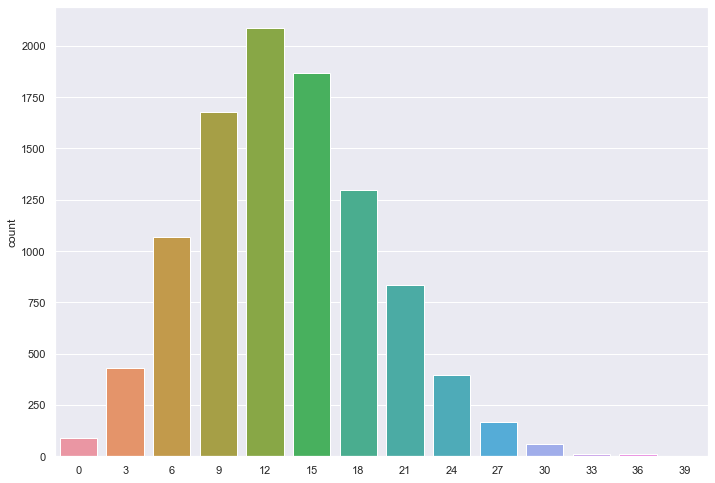

In [59]:
import random
import seaborn as sns

random.seed(42)

# functions


def roll(s=6):
    #simulate the rolling of an s sided dice
    return random.randint(1,s)

def determine_wound_roll(S,T):
    #determine the roll required to wound the target
    wound = 5
    if S >= 2*T:
        wound = 2
    elif S > T:
        wound = 3
    elif S == T:
        wound = 4
    elif 2*S <= T:
        wound = 6
    if plus_1_to_wound:
        wound = wound - 1
    return wound

def roll_to_hit(ws):
    # determine the outcome of a simgle roll to hit
    hit_roll = roll()
    if reroll_hit and hit_roll < ws:
        hit_roll = roll()
    elif reroll_1s_hit and hit_roll ==1:
        hit_roll = roll()
    if hit_roll == 6:
        return 'explode'
    elif hit_roll >= ws:
        return 'hit'
    else:
        return 'miss'

def roll_to_wound():
    # determine the outcome of a single roll to wound
    wound_roll = roll()
    if reroll_wound and wound_roll < wound:
        wound_roll = roll()
    elif reroll_1s_wound and wound_roll ==1:
        wound_roll = roll()
    if wound_roll >= wound:
        return 'wound'
    else:
        return 'miss'

def roll_to_save():
    # determine the outcome of a single roll to save
    if roll() <= min(save + ap, invulnerable_save):
        return 'failed'
    else:
        return 'saved'

def apply_damage(damage):
    # apply damage and add it to the results list
    if type(damage) == int:
        results.append(damage)
    elif type(damage) == tuple:
        results.append(damage[0]+ sum([roll(3) for _ in range(damage[1])])+sum([roll() for _ in range(damage[2])]))

# attacker characteristics
ws = 4
S = 4
ap = 1
# damage input format (number of individual damage, number of D3's, number of D6's)
damage = 3
attacks = 30

# defender characteristics
T = 4
save = 3
invulnerable_save = 7

# are there rerolls or modifiers in play
reroll_1s_hit = False
reroll_hit = False
reroll_1s_wound = False
reroll_wound = False
plus_1_to_wound = True
explode6_hit = False

# set variables
num_sims = 10000
spread = []
#determine the wound roll
wound = determine_wound_roll(S,T)

# do 10000 simulations
for i in range(num_sims):
    results = []
    for j in range(attacks):
        # hit roll
        hit_roll = roll_to_hit(ws)
        if hit_roll == ('hit' or 'explode'):
            
            # wound roll
            if roll_to_wound() == 'wound':
                    
                # save roll
                if roll_to_save() == 'failed':
                    apply_damage(damage)
        

    spread.append(sum(results))
spread.sort()

# print damage distribution
print('expectation value: ', spread[round(num_sims/2)])
print('expected damage output between:',spread[round(num_sims*.1667)],'and',spread[round(num_sims*.8333)])

# determine probability of each outcome
outcome = 0

for index, number in enumerate(spread):
    if number > outcome:
        outcome = number
        print(outcome,'-->', round((num_sims-index)*100/num_sims,2), '%' )

# graph the results
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.countplot(x=spread)
# g.set_yticklabels(['0%','2%','4%','6%','8%','10%','12%','14%'])